In [ ]:
# Import Libraries

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# connect to database and extract data

conn = mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='root',
    database='banking_case'
)

query = 'SELECT * FROM customer'

df = pd.read_sql(query, conn)

df.head()

conn.close() # close the connection 

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_3776\4267859420.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df.shape

(3000, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Client ID              3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [5]:
#generate descriptive statistics
df.describe()  

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [22]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 ï»¿Client ID                0
Name                        0
Age                         0
Location ID                 0
Joined Bank                 0
Banking Contact             0
Nationality                 0
Occupation                  0
Fee Structure               0
Loyalty Classification      0
Estimated Income            0
Superannuation Savings      0
Amount of Credit Cards      0
Credit Card Balance         0
Bank Loans                  0
Bank Deposits               0
Checking Accounts           0
Saving Accounts             0
Foreign Currency Account    0
Business Lending            0
Properties Owned            0
Risk Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64


In [23]:
# change the data type to appropriate type
df['Joined Bank'] = pd.to_datetime(df['Joined Bank'], format='%d-%m-%Y')
print(df['Joined Bank'].dtype)

datetime64[ns]


## Categorical Features

### Univariate  Analysis

<Axes: xlabel='Income Band'>

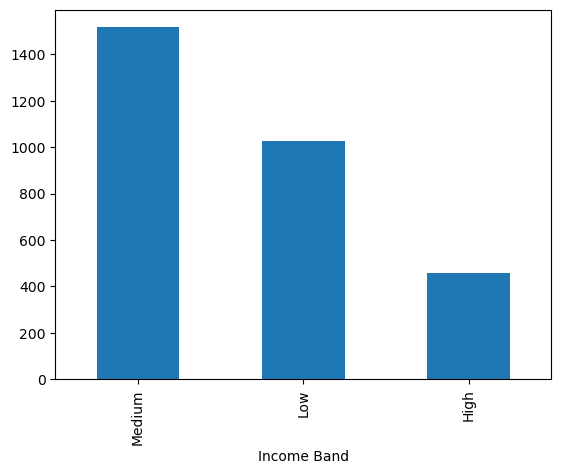

In [ ]:
# set the bounderies for Income Bands
bin = [0, 100000, 300000, float('inf')]
labels=['Low', 'Medium', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bin, labels=labels, right=False)
df['Income Band'].value_counts().plot(kind='bar')

In [7]:
# Examine the distribution of unique catregories in categorical columns
categorical_cols = df[['BRId', 'GenderId', 'IAId', 'Age', 'Nationality', 'Occupation', 'Fee Structure', 'Loyalty Classification','Properties Owned', 'Risk Weighting', 'Income Band']].columns
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    display(df[col].value_counts())


Value counts for 'BRId':


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value counts for 'GenderId':


GenderId
2    1512
1    1488
Name: count, dtype: int64

Value counts for 'IAId':


IAId
1     177
3     177
4     177
8     177
2     177
11    176
15    176
14    176
13    176
12    176
10    176
9     176
7      89
6      89
5      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value counts for 'Age':


Age
28    60
76    59
73    54
27    54
47    52
      ..
82    34
57    33
77    32
68    31
39    31
Name: count, Length: 69, dtype: int64

Value counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value counts for 'Occupation':


Occupation
Structural Analysis Engineer    28
Associate Professor             28
Recruiter                       25
Human Resources Manager         24
Account Coordinator             24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value counts for 'Fee Structure':


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value counts for 'Loyalty Classification':


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value counts for 'Properties Owned':


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value counts for 'Risk Weighting':


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value counts for 'Income Band':


Income Band
Medium    1517
Low       1027
High       456
Name: count, dtype: int64

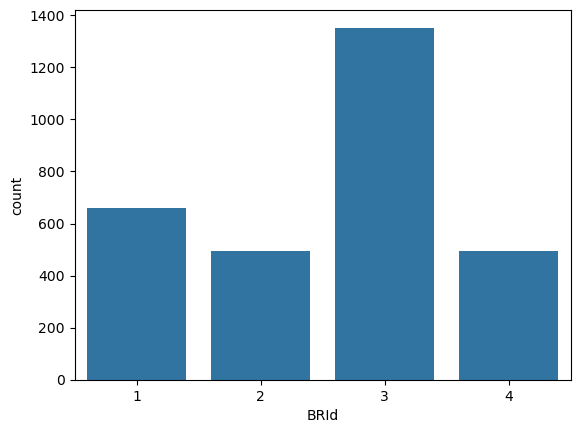

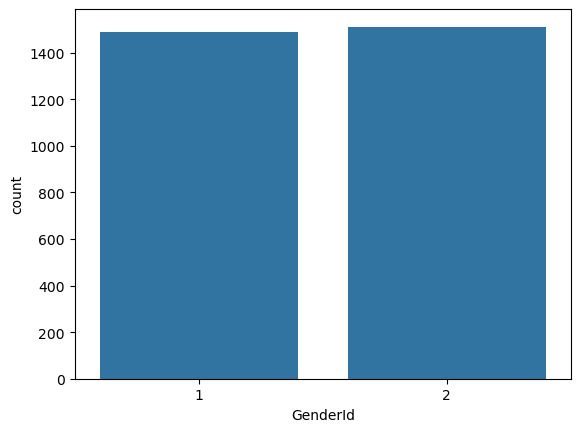

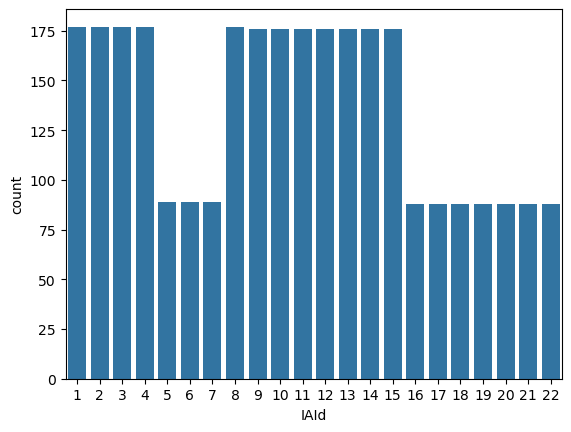

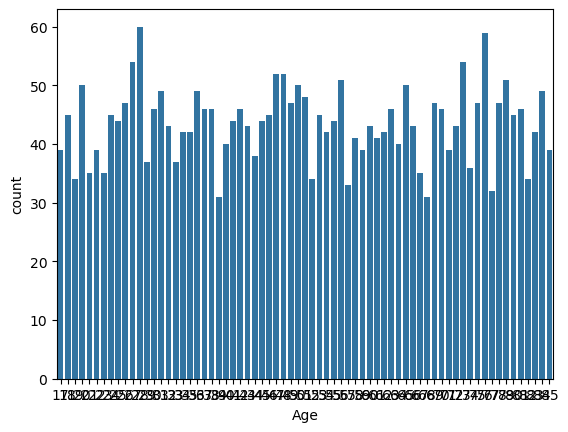

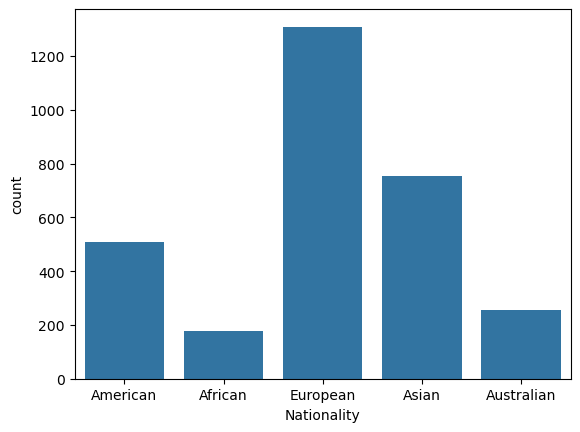

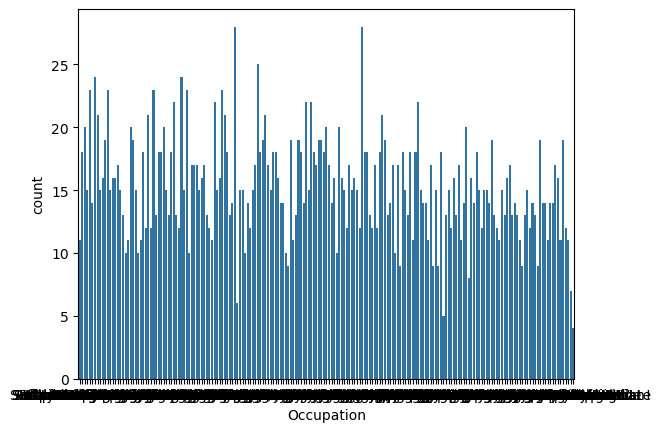

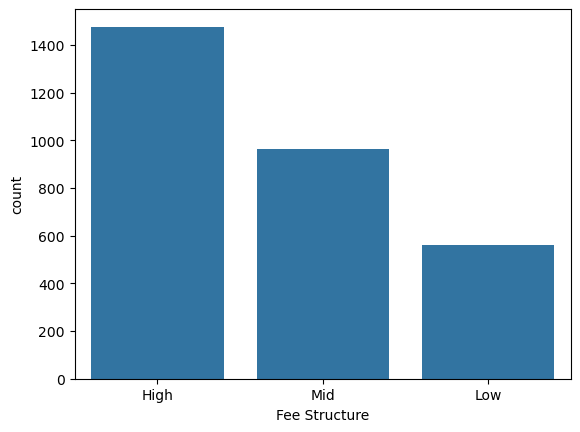

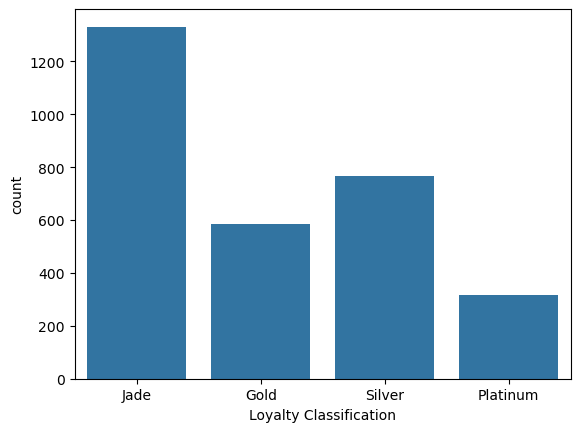

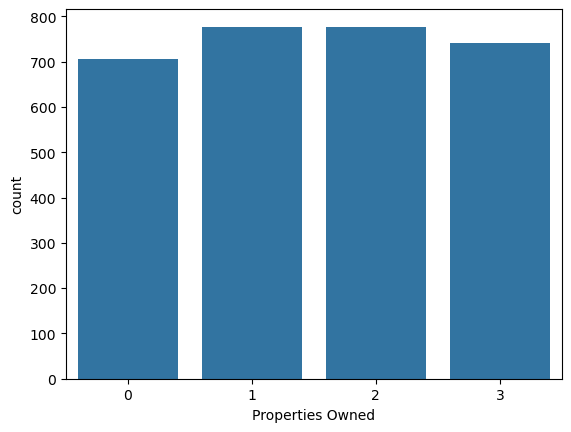

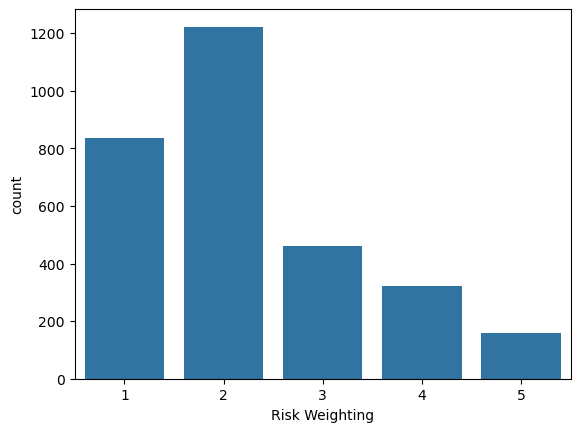

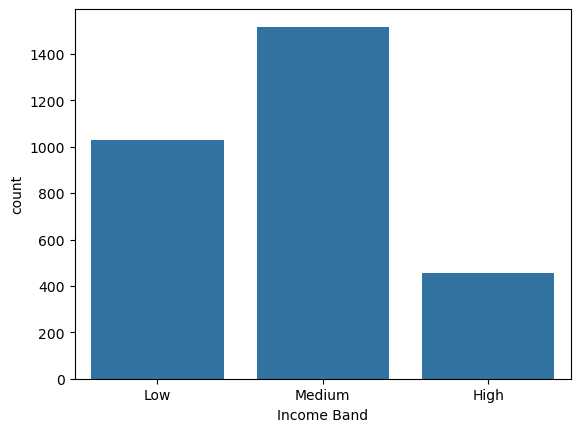

In [ ]:
# display count of each category
for i, col in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=df[col])

### Bivariate Analysis

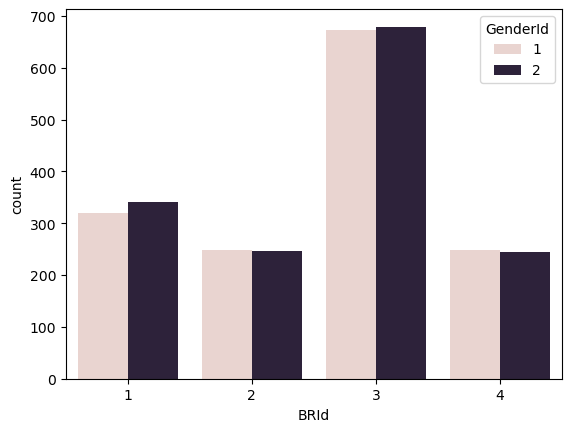

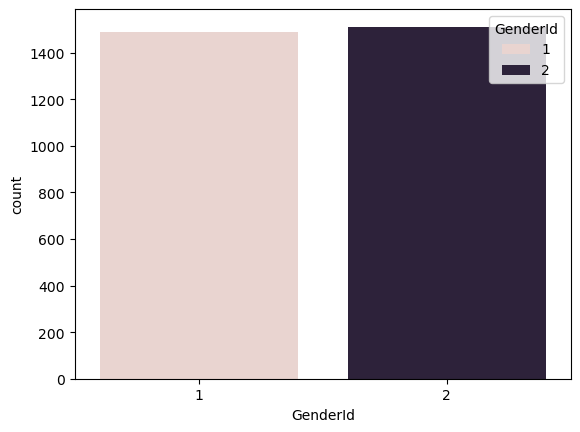

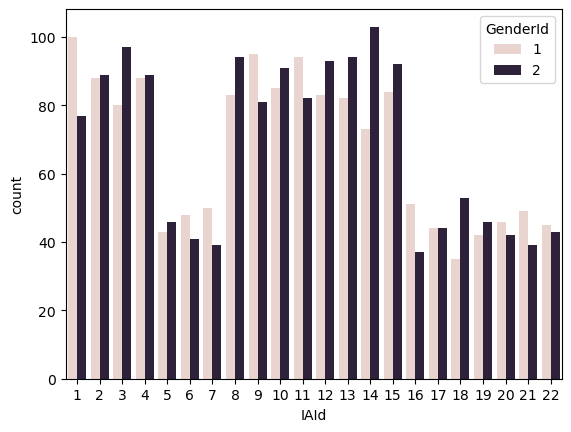

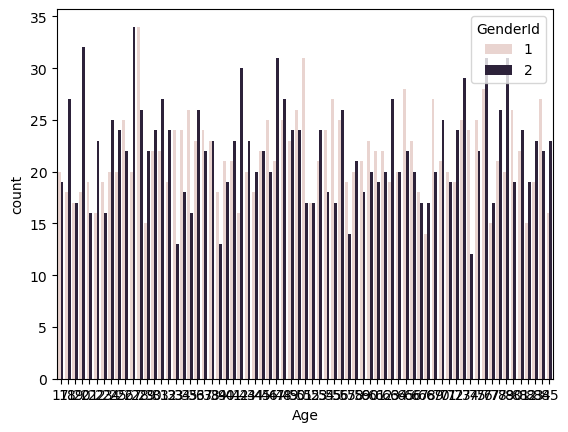

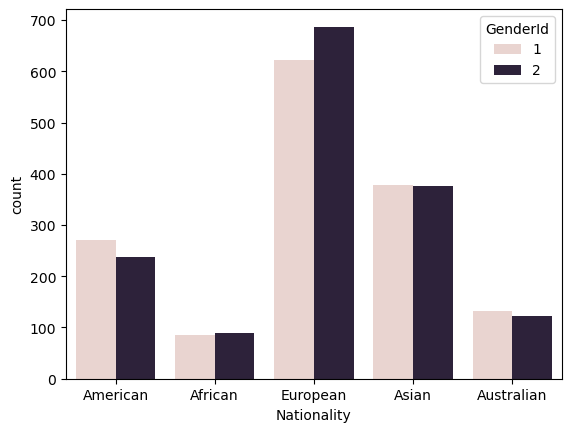

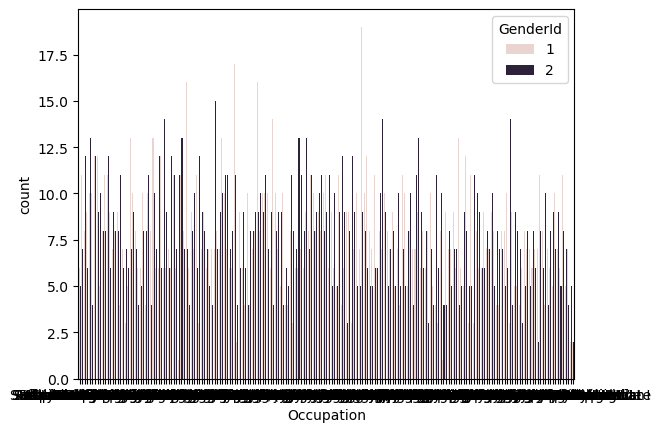

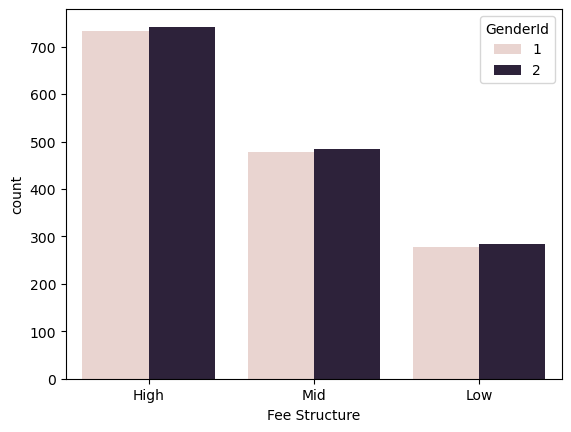

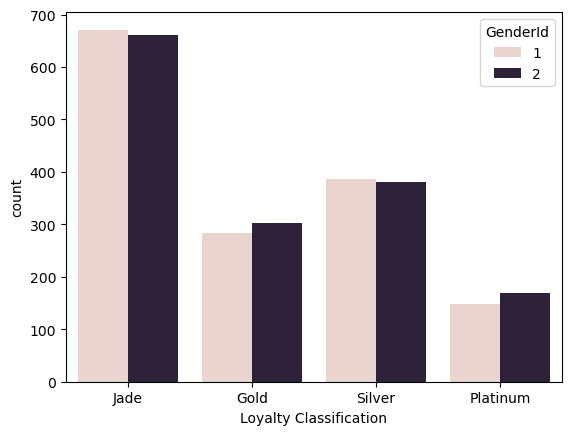

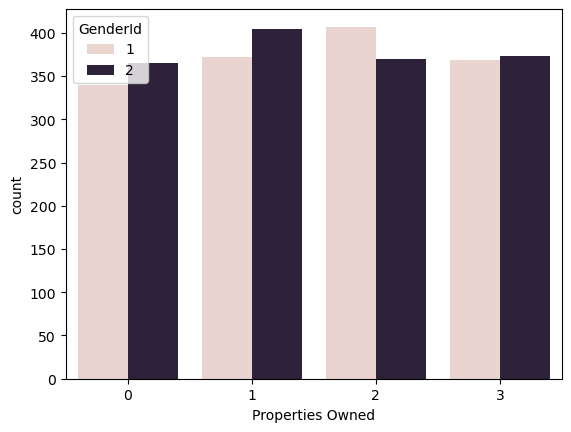

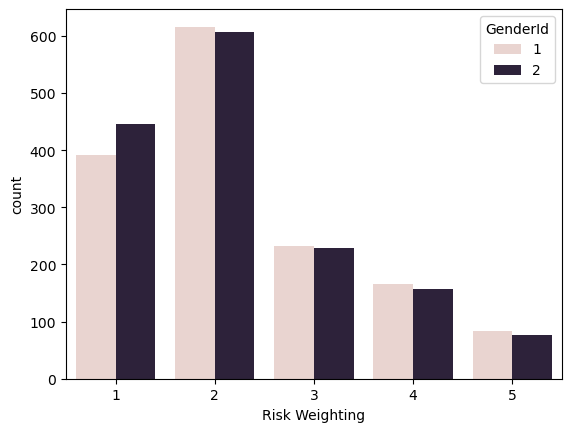

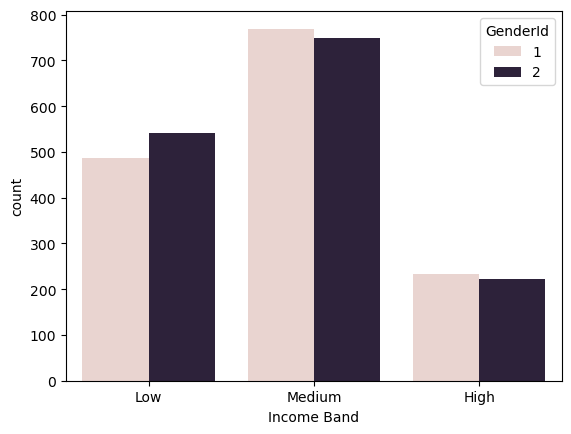

In [ ]:
# count of each category divided by gender
for i, col in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=col, hue='GenderId')

c:\Users\Toshiba\anaconda3\envs\python_course\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


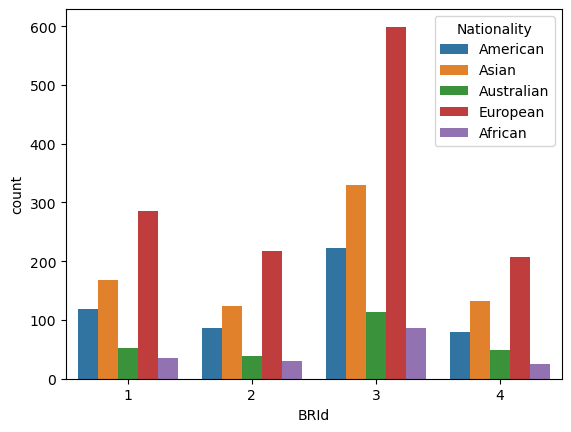

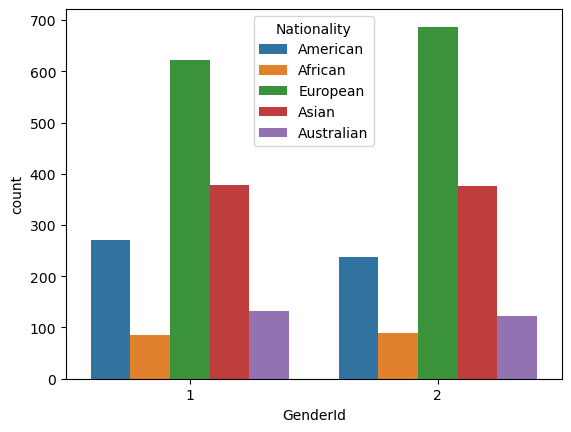

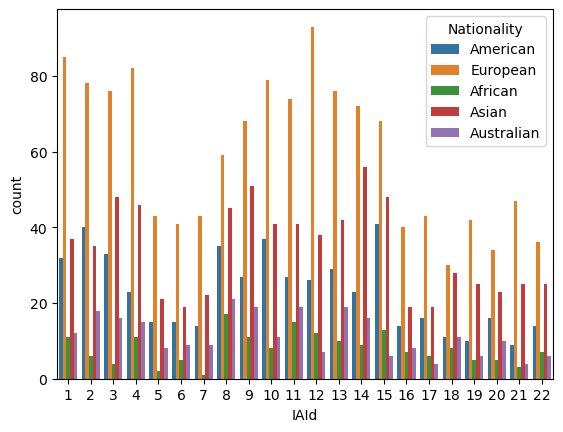

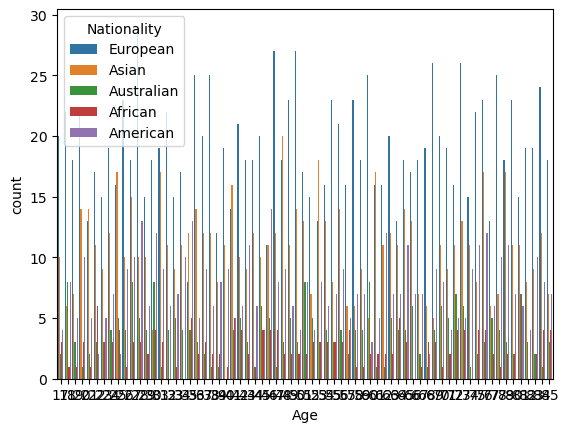

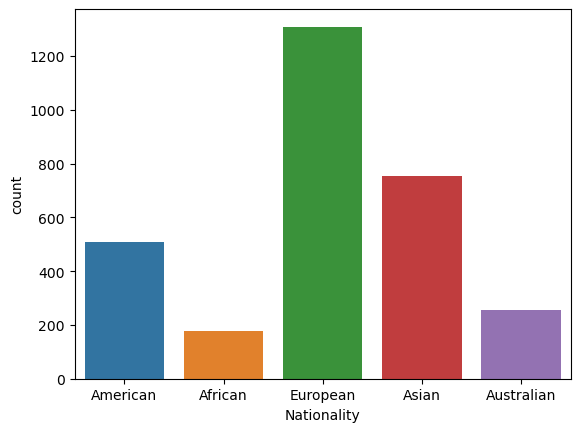

c:\Users\Toshiba\anaconda3\envs\python_course\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


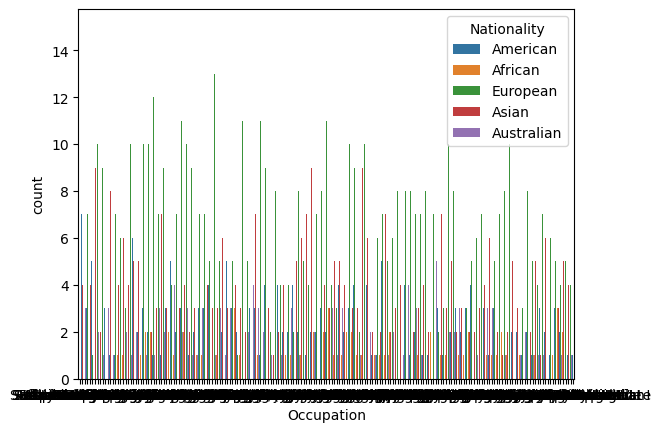

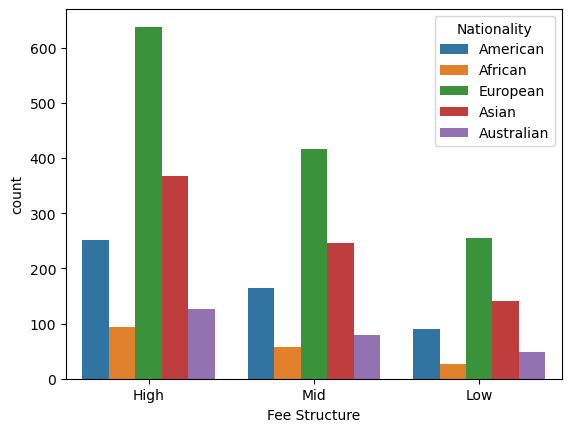

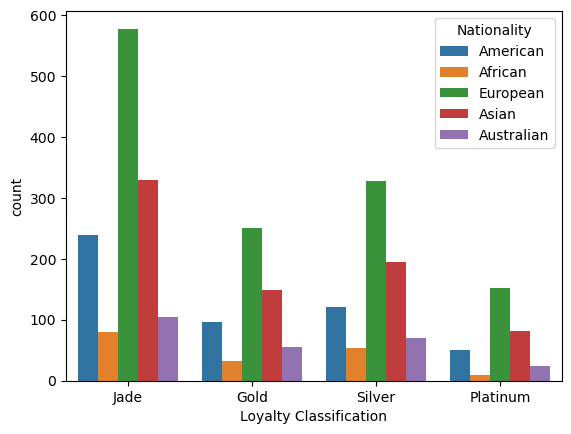

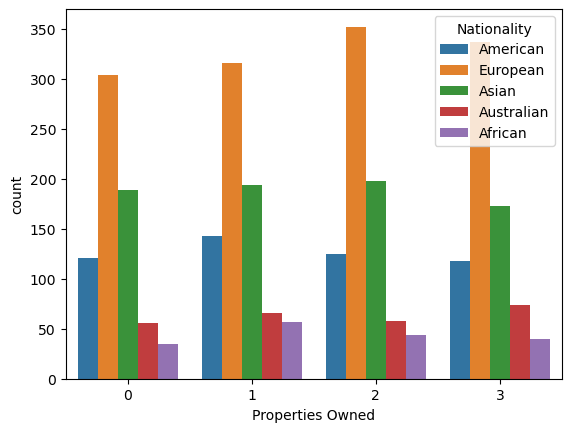

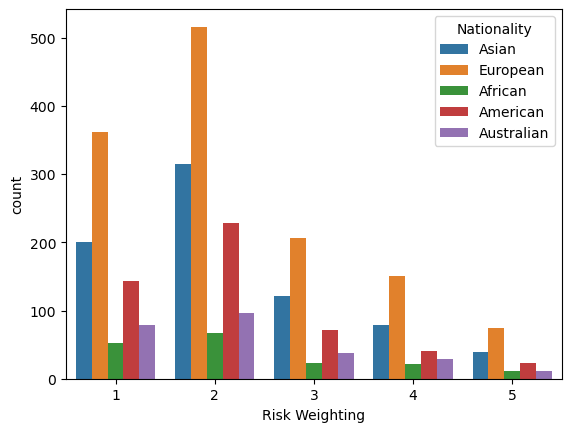

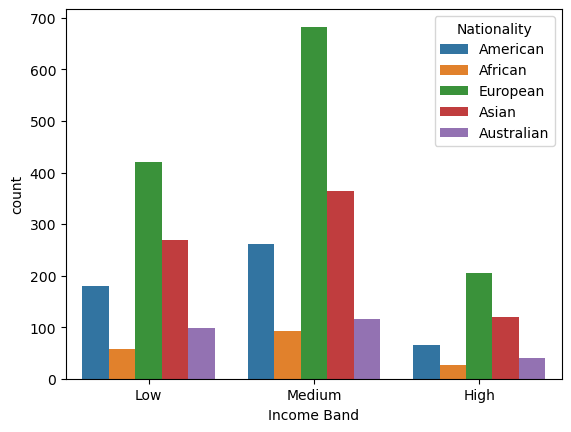

In [ ]:
# count of each category divided by nationality
for i, col in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(data=df, x=col, hue='Nationality')

### Numerical Analysis

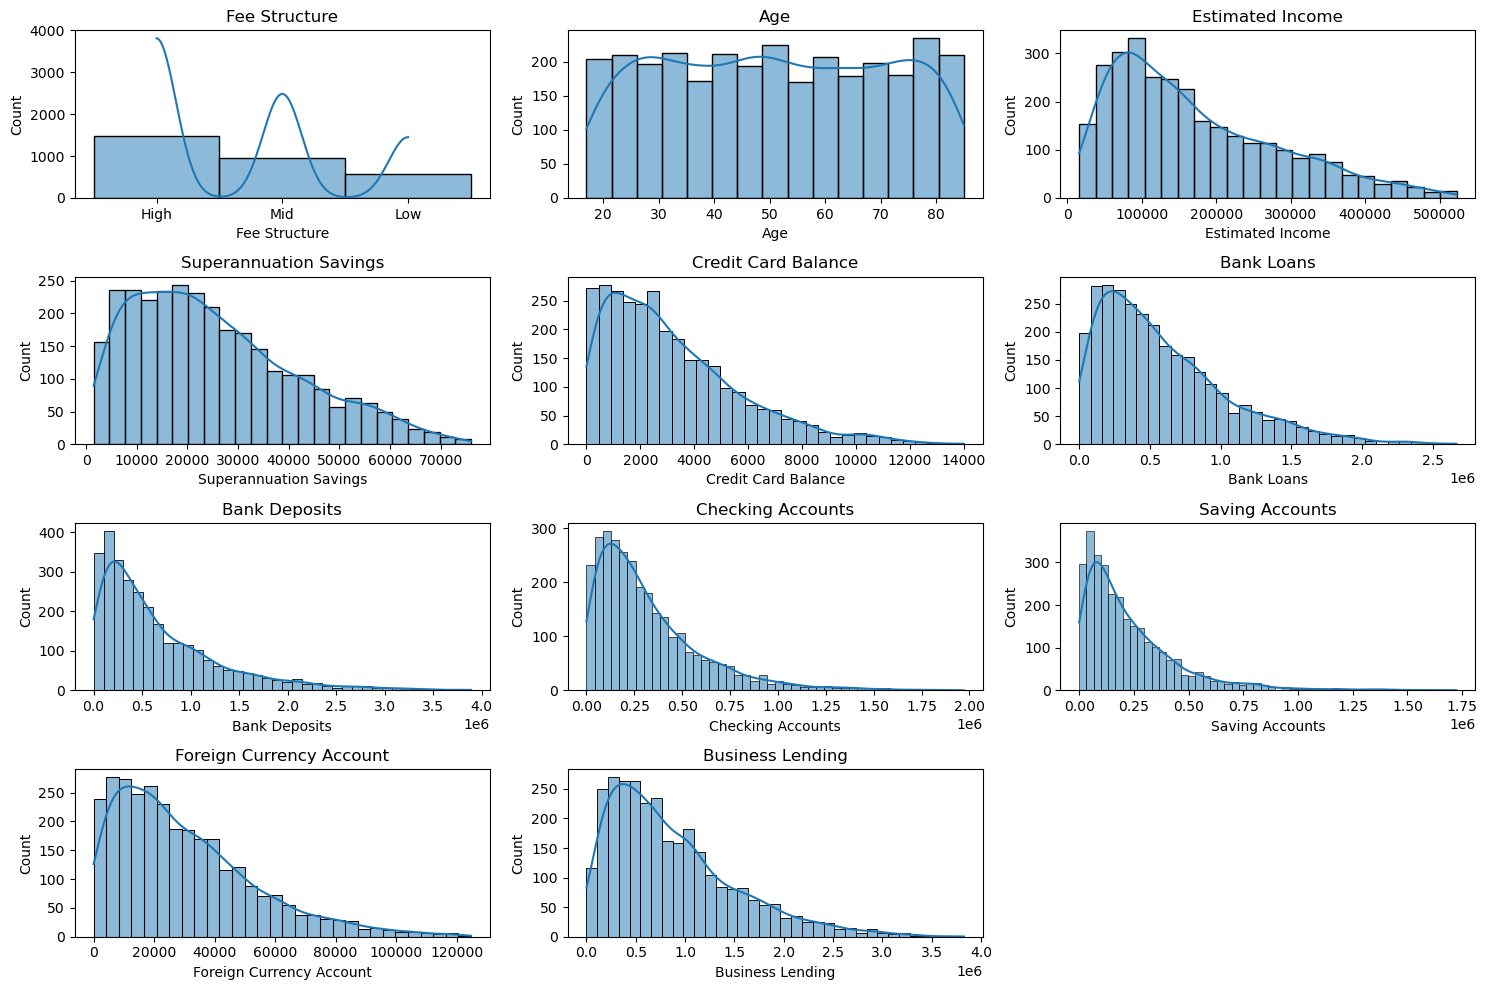

In [24]:
# Numerical analysis and exploration
numerical_cols = ['Fee Structure','Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance', 'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts', 'Foreign Currency Account', 'Business Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

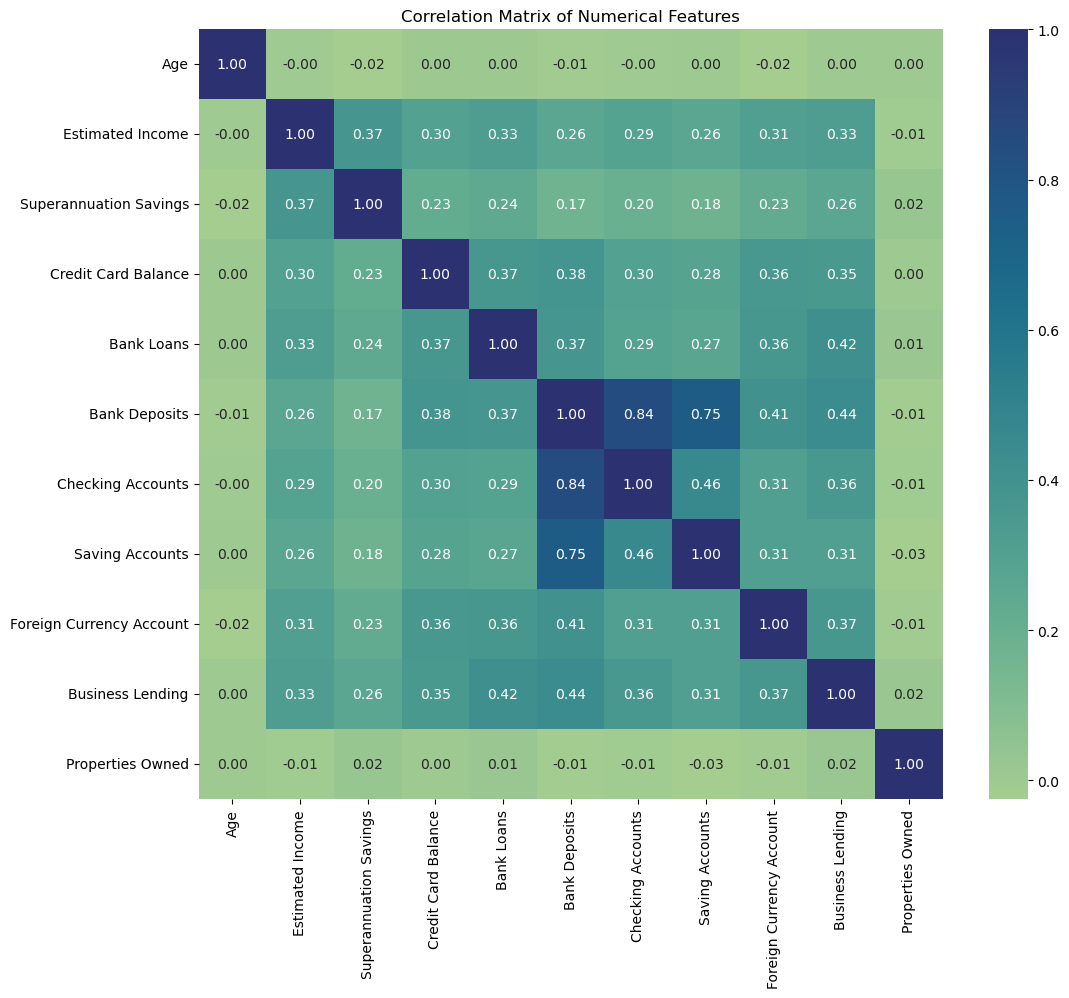

In [ ]:
# Bivariate Analysis

# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending', 'Properties Owned']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

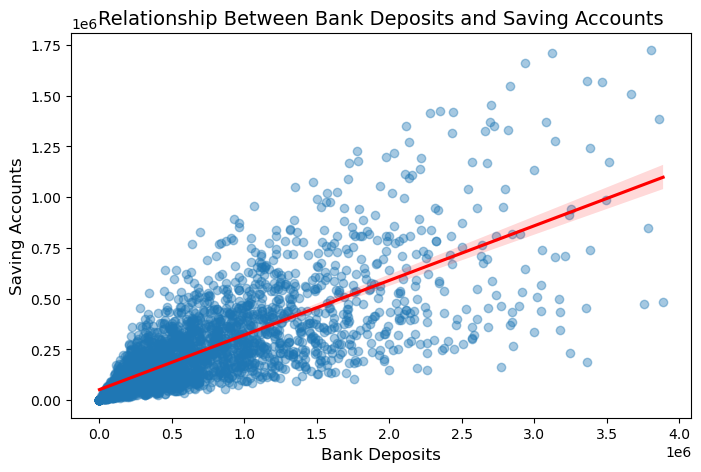

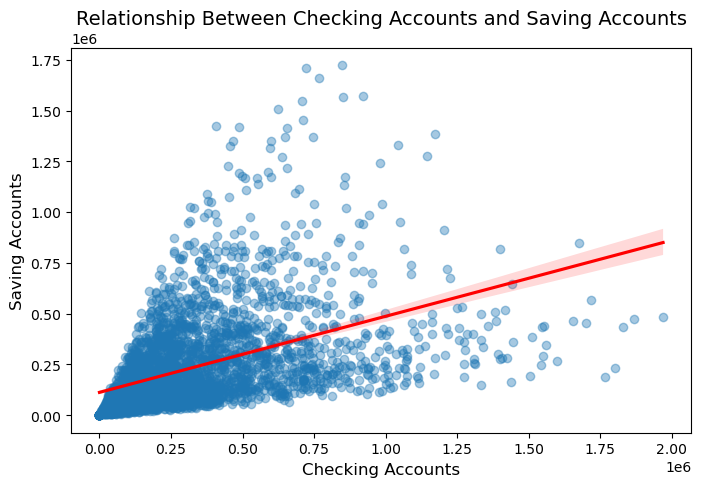

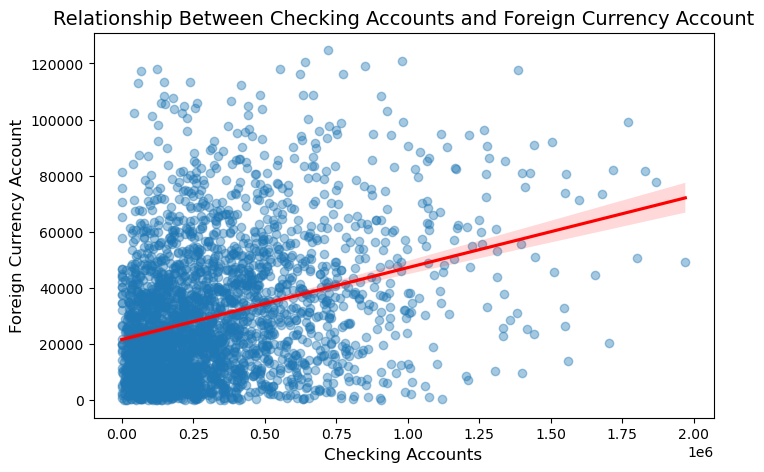

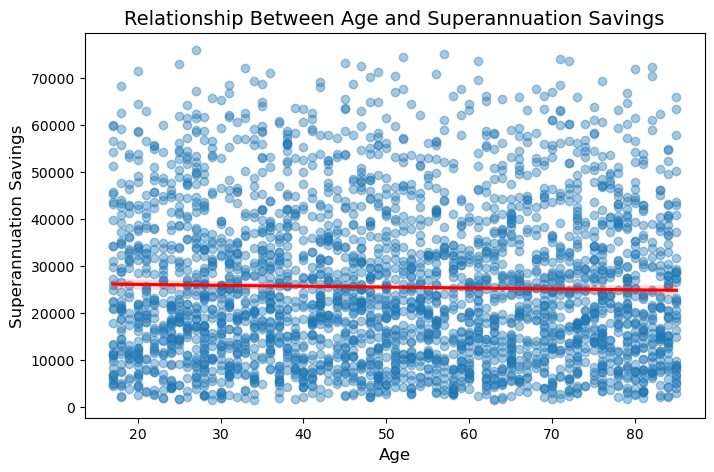

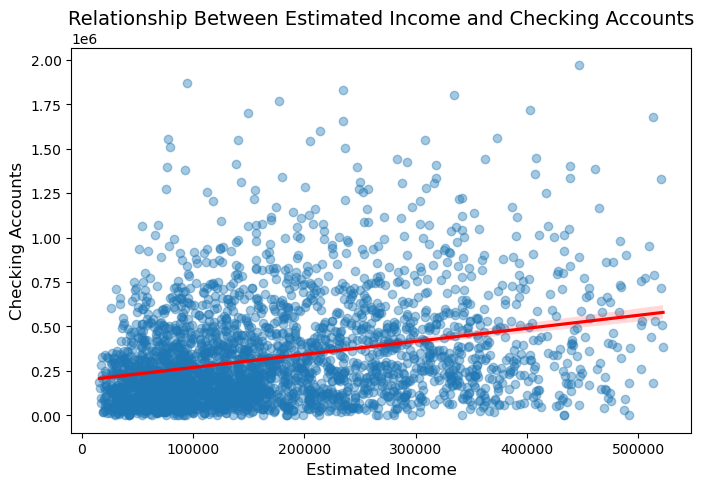

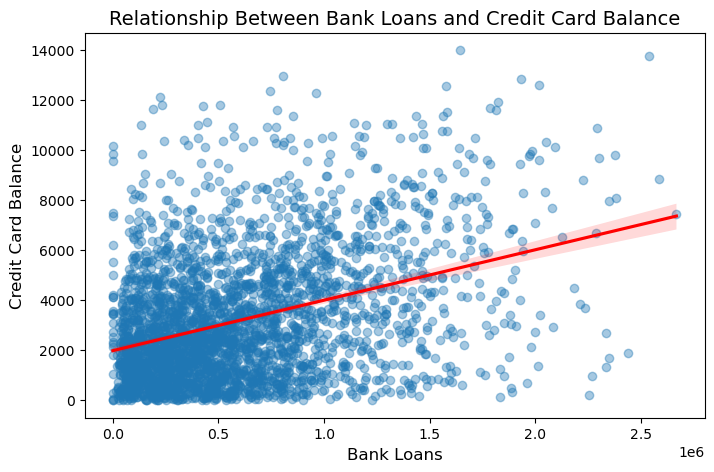

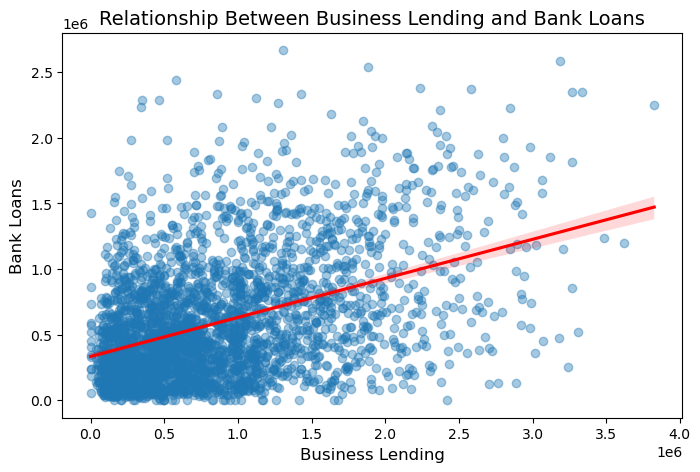

In [21]:
pairs_to_plot = [
    ('Bank Deposits', 'Saving Accounts'),
    ('Checking Accounts', 'Saving Accounts'),
    ('Checking Accounts', 'Foreign Currency Account'),
    ('Age', 'Superannuation Savings'),
    ('Estimated Income', 'Checking Accounts'),
    ('Bank Loans', 'Credit Card Balance'),
    ('Business Lending', 'Bank Loans'),
]

for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 5))
    sns.regplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'red'}
        )
    plt.title(f'Relationship Between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.show()

## Insights

### Deposits and Savings Behavior

The high correlation between Bank Deposits and Saving Accounts suggests that these may either measure overlapping financial behavior (e.g., total funds a customer keeps in the bank) or that people who actively deposit funds also tend to maintain or grow savings balances.


### Income, Age, and Accumulation

Moderate correlations of Age and Estimated Income with various balances (Superannuation, Savings, Checking) reflect a common financial lifecycle trend: higher income earners and older individuals often accumulate more savings, retirement funds, and may carry higher credit card balances or loans.


### Low Correlation with Properties Owned

Property ownership may depend on external factors (location, real estate market conditions, inheritance, etc.) that are not captured by these particular banking variables. Hence, we see weaker correlations here.


### Business vs. Personal Banking


Business Lending’s moderate link to Bank Loans suggests some customers may have both personal and business debts. However, business lending is relatively uncorrelated with other deposit or property-related metrics, indicating it may serve a distinct subset of customers or needs.
